## Read Undersampled_data:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from zipfile import ZipFile
import nbimporter
import random_forest_method
import performance_measure
from sklearn.preprocessing import MinMaxScaler
import svm_method
import data_sampling
import split_data_set

Importing Jupyter notebook from random_forest_method.ipynb
Importing Jupyter notebook from performance_measure.ipynb
Importing Jupyter notebook from svm_method.ipynb
Importing Jupyter notebook from data_sampling.ipynb
Importing Jupyter notebook from split_data_set.ipynb


In [2]:
path = "../../../undersampled_data.zip"

zip_file = ZipFile(path)
undersampled_data = pd.read_csv(zip_file.open('undersampled_data.csv')) #, nrows=500000)
#data = pd.read_csv(path, compression='zip', sep=',')#, nrows=500000)

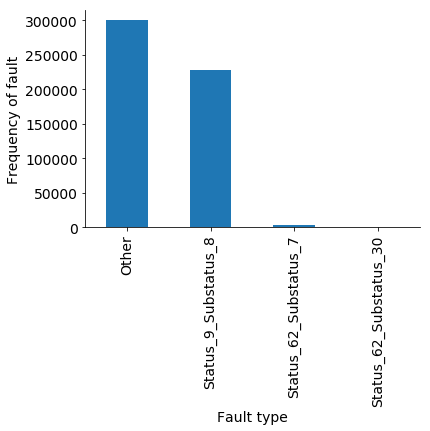

<Figure size 1440x1152 with 0 Axes>

In [3]:
data_sampling.plot_balance(undersampled_data, 'Status')

In [4]:
print(undersampled_data['Status'].value_counts())

Other                     300000
Status_9_Substatus_8      228668
Status_62_Substatus_7       4098
Status_62_Substatus_30       383
Name: Status, dtype: int64


## Do more undersampling

In [5]:
undersampled_data = data_sampling.undersample_dataset(undersampled_data,50000,"Other")
undersampled_data = data_sampling.undersample_dataset(undersampled_data,50000,"Status_9_Substatus_8")

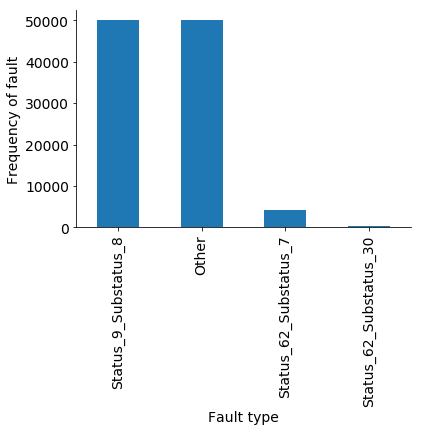

<Figure size 1440x1152 with 0 Axes>

In [6]:
data_sampling.plot_balance(undersampled_data, 'Status')

In [7]:
X = undersampled_data.drop(columns = ['Status', 'TimeStamp'])
y = undersampled_data.Status
X.shape

(104481, 34)

In [8]:
y.value_counts()

Status_9_Substatus_8      50000
Other                     50000
Status_62_Substatus_7      4098
Status_62_Substatus_30      383
Name: Status, dtype: int64

### Split into training and test

In [9]:
X_train, X_test, y_train, y_test = split_data_set.split_data(X,y)

In [10]:
y_train.value_counts()

Status_9_Substatus_8      33500
Other                     33500
Status_62_Substatus_7      2746
Status_62_Substatus_30      256
Name: Status, dtype: int64

## Random forest and feature importance

Normalized confusion matrix
[[9.91818182e-01 1.21212121e-04 2.60606061e-03 5.45454545e-03]
 [1.96850394e-01 8.03149606e-01 0.00000000e+00 0.00000000e+00]
 [2.95857988e-03 0.00000000e+00 9.97041420e-01 0.00000000e+00]
 [3.63636364e-03 1.81818182e-04 0.00000000e+00 9.96181818e-01]]


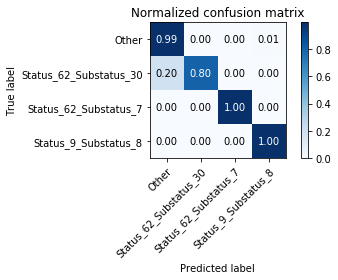

Total Accuracy 		0.993

Status 				 Precision 	 Recall 	 F1
----------------------------------------------------------------------
Other                     	 0.995 		 0.992 		 0.993
Status_62_Substatus_30    	 0.953 		 0.803 		 0.872
Status_62_Substatus_7     	 0.969 		 0.997 		 0.983
Status_9_Substatus_8      	 0.995 		 0.996 		 0.995


In [12]:
rf = random_forest_method.get_rf_model(X_train, X_test, y_train, y_test)

In [13]:
rf

,importance
ActivePower,0.165590
Log-T-Raw-TransformerTemperature,0.088249
Log-T-Raw-Rectifier1HeatSink,0.087737
Log-T-Raw-Stator2Temperature,0.048115
Average blade angle across A B C,0.045301
Log-T-Raw-Rectifier2HeatSink,0.043441
Log-T-Raw-Rotor1Temperature,0.039046
Log-T-Raw-Rotor2Temperature,0.037355
Log-T-Raw-Stator1Temperature,0.035769
Log-T-Raw-NacelleAmbientTemperature,0.033071


# Preprocessing

### Scale dataset

In [14]:
print(X_train.shape)

scaler  = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print(X_train_scaled.shape)

(70002, 34)
(70002, 34)


In [15]:

scaler = MinMaxScaler(copy=False)
X_train_scaled = scaler.fit(X_train)
X_train_scaled = X_train_scaled.transform(X_train)
X_train = pd.DataFrame(X_train_scaled, columns=list(X))
X_train.head(10)

X_test_scaled = scaler.fit(X_test)
X_test_scaled = X_test_scaled.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=list(X))
X_test_scaled.head(10)

,WindVane,WindSpeed,RotorSpeed,NacelleDirection,ActivePower,Spinner-Temperature,Log-T-Raw-FrontBearingTemperature,Log-T-Raw-RearBearingTemperature,Log-T-Raw-BladeAPitchHeatSink,Log-T-Raw-BladeBPitchHeatSink,...,Log-T-Raw-Rectifier1HeatSink,Log-T-Raw-Rectifier2HeatSink,Log-T-Raw-RectifierCabinetTemperature,Log-T-Raw-ExcitationHeatSink,Ambient-Temperature,Log-T-Raw-TowerTemperature,Log-T-Raw-ControlCabinetTemperature,Log-T-Raw-TransformerTemperature,Average blade angle across A B C,WindDirection
0,0.502756,0.068010,0.327608,0.233983,0.000000,0.413333,0.264516,0.266234,0.411111,0.420455,...,0.161290,0.197531,0.384615,0.297872,0.250000,0.379747,0.549020,0.216495,0.000000,0.433491
1,0.488541,0.214106,0.739803,0.378830,0.303371,0.480000,0.341935,0.350649,0.455556,0.477273,...,0.602151,0.444444,0.400000,0.521277,0.288462,0.455696,0.274510,0.340206,0.000000,0.530625
2,0.490281,0.229219,0.507514,0.718663,0.000000,0.466667,0.290323,0.292208,0.500000,0.522727,...,0.860215,0.925926,0.538462,0.478723,0.384615,0.481013,0.294118,0.298969,0.176880,0.783461
3,0.475776,0.246851,0.813225,0.715877,0.467749,0.666667,0.406452,0.389610,0.544444,0.579545,...,0.698925,0.543210,0.538462,0.500000,0.442308,0.569620,0.450980,0.463918,0.000000,0.771087
4,0.507978,0.163728,0.622585,0.428969,0.185185,0.586667,0.400000,0.383117,0.633333,0.659091,...,0.623656,0.629630,0.676923,0.521277,0.442308,0.632911,0.509804,0.587629,0.000000,0.581563
5,0.553235,0.239295,0.841134,0.571031,0.653350,0.626667,0.387097,0.363636,0.433333,0.477273,...,0.602151,0.481481,0.384615,0.446809,0.365385,0.544304,0.392157,0.463918,0.001633,0.718911
6,0.472585,0.362720,0.902963,0.423398,0.980025,0.720000,0.412903,0.370130,0.500000,0.545455,...,0.666667,0.592593,0.353846,0.372340,0.423077,0.670886,0.549020,0.670103,0.041580,0.675191
7,0.522193,0.113350,0.574925,0.718663,0.131502,0.680000,0.451613,0.376623,0.488889,0.522727,...,0.602151,0.740741,0.476923,0.510638,0.461538,0.658228,0.588235,0.680412,0.000000,0.806146
8,0.482158,0.130982,0.518248,0.498607,0.000000,0.440000,0.290323,0.233766,0.411111,0.420455,...,0.795699,0.901235,0.446154,0.382979,0.173077,0.341772,0.313725,0.195876,0.077719,0.614766
9,0.512910,0.118388,0.468441,0.657382,0.066167,0.666667,0.393548,0.363636,0.611111,0.625000,...,0.612903,0.666667,0.615385,0.457447,0.576923,0.670886,0.549020,0.381443,0.000000,0.754176


### SVM method

In [ ]:
svm_method.get_svm_model(X_train_scaled, X_test_scaled, y_train, y_test)

### SMOTE (Synthetic Minority Oversampling Technique):

In [ ]:
sm = SMOTE(random_state=12)
X_